# ASTR 420 - Week 7:  "The Distribution of Nebulae" 

In Chapter 3 of "The Realm of the Nebulae", Hubble discusses the large-scale distribution of "nebulae" on the sky.  

Below is a figure of Hubble's observations, which showed that at high galactic latitudes, the density of galaxies on the sky is appoximately constant, while numbers are suppressed at latitudes close to the Milky Way's disk, where their observation is obscured by high densities of stars and the interstellar medium.

![GalaxyCounts](img/Realm_0079.jpg)

The **galactic coordinate system** defines the Sun as the origin. Galactic longitude (l) is measured with primary direction from the Sun to the center of the galaxy in the galactic plane, while the galactic latitude (b) measures the angle of the object above the galactic plane.

![GalaxyCoords](img/Galactic_coordinates.jpeg)


**In this tutorial, we will explore the distribution of stars and galaxies in the SDSS dataset, and also map the levels of dust extinction affecting distant galaxies, as a function of galactic latitude.**
 
 Let's start, as always, by importing all of the most important libraries that we're likely to need...

In [1]:
# Import Python libraries to work with SciServer (see http://www.sciserver.org/docs/sciscript-python/)

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
print('SciServer libraries imported')

# Apply some special settings to the imported libraries

# ensures columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Image, SVG, Math
print('Settings applied')

# So that we're able to make plots, import matplotlib and some of its modules

import matplotlib
%config InlineBackend.rc = {}
from matplotlib import pylab as plt
%matplotlib inline
print('OK')


SciServer libraries imported
Settings applied
OK


-----------------

## Mapping the distribution of stars and galaxies and other objects in galactic coordinates

Let's follow Hubble's lead and investigate how uniformly (or not) stars and galaxies appear to be in the sky.

The query below returns the number of photometric objects in a defined search area, in coordinates of RA and Dec.  

Modify this query to search for specified ranges in **galactic coordinates** and analyze the returned counts. Then, plot the relative number density (e.g., fraction, by type, of objects per square degree on the sky), as a function of galactic latitude.  In other words, sample areas of the sky at different galactic latitudes, each time measuring what fraction of the total number of objects are galaxies, what fraction are stars, etc., Then put it all together in a plot so you can interpret the results.

Things to note:
- Due to the spherical nature of sky coordinates, measuring the area on the sky defined by a range of "b" and "l" (galactic latitude and longitude) is a little complicated.  By measuring the **relative number** of each type of object, you can get around needing to actually calculate the solid angle of sky that you're sampling when you make these measurements. **But bonus points will be awarded if you can also require equal areas of sky for each galactic latitude measurement!**

- You should not restrict your search to objects with spectra. So, you need only query the [PhotoPrimary](https://skyserver.sdss.org/dr12/en/help/browser/browser.aspx#&&history=description+PhotoPrimary+V) table. 


In [2]:
# Here's an example query to count all of the objects in a rectangular search in RA and Dec coordinates.
#
# Modify the rectangular search box to sample the survey at different latitudes in GALACTIC COORDINATES
#
query="""
SELECT count(*) as 'total',
    sum( case when (Type=3) then 1 else 0 end) as 'Galaxies',
    sum( case when (Type=6) then 1 else 0 end) as 'Stars',
    sum( case when (Type not in (3,6)) then 1 else 0 end) as 'Other'
FROM PhotoPrimary 
WHERE (ra between 265.4 and 267.4) and (dec between 30 and 31) 
"""
obj_counts = CasJobs.executeQuery(query, "dr15")
obj_counts

# Note that you can return the number of galaxies in the search area with the following command:
#
# obj_counts['Galaxies'][0]

,total,Galaxies,Stars,Other
0,1621,488,1133,0


In [3]:
query="""
SELECT count(*) as 'total',
    sum( case when (Type=3) then 1 else 0 end) as 'Galaxies',
    sum( case when (Type=6) then 1 else 0 end) as 'Stars',
    sum( case when (Type not in (3,6)) then 1 else 0 end) as 'Other'
FROM PhotoPrimary 
WHERE (b between 20 and 30) 
"""
obj_counts = CasJobs.executeQuery(query, "dr15")
obj_counts

# Note that you can return the number of galaxies in the search area with the following command:
#
# print(obj_counts['Galaxies'][0])
#frac_galaxies = obj_counts['Galaxies'][0]/(obj_counts['Galaxies'][0]+obj_counts['Stars'][0])
frac_galaxies = obj_counts['Galaxies'][0]/(obj_counts['total'][0])
print(frac_galaxies)

0.3800971436949104


In [4]:
# set up a range of galactic latitudes
brange = np.linspace(0,90,10)
print(brange)

# for every bin in galactic latitude, calculate the fraction of objects that are galaxies
galfrac = []
for b in brange:
    bmin = b-1.
    bmax = b+1.
    #print(bmin, bmax)
    query="""
    SELECT count(*) as 'total',
        sum( case when (Type=3) then 1 else 0 end) as 'Galaxies',
        sum( case when (Type=6) then 1 else 0 end) as 'Stars',
        sum( case when (Type not in (3,6)) then 1 else 0 end) as 'Other'
    FROM PhotoPrimary 
    WHERE (b between %f and %f)
    """  % (bmin,bmax)
    obj_counts = CasJobs.executeQuery(query, "dr16")
    obj_counts

    galfraction = obj_counts['Galaxies'][0]/obj_counts['total'][0]
    print(bmin, bmax, round(galfraction,3))
    galfrac.append(galfraction)
print(galfrac) 

[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
-1.0 1.0 0.082
9.0 11.0 0.124
19.0 21.0 0.303
29.0 31.0 0.437
39.0 41.0 0.523
49.0 51.0 0.59
59.0 61.0 0.618
69.0 71.0 0.64
79.0 81.0 0.656
89.0 91.0 0.652
[0.0823281753848039, 0.1235748424034516, 0.30260557682946854, 0.4373468650512748, 0.5232062613297409, 0.5903595092407707, 0.6179550646453099, 0.6403595024335726, 0.6558484831368175, 0.652356282379377]


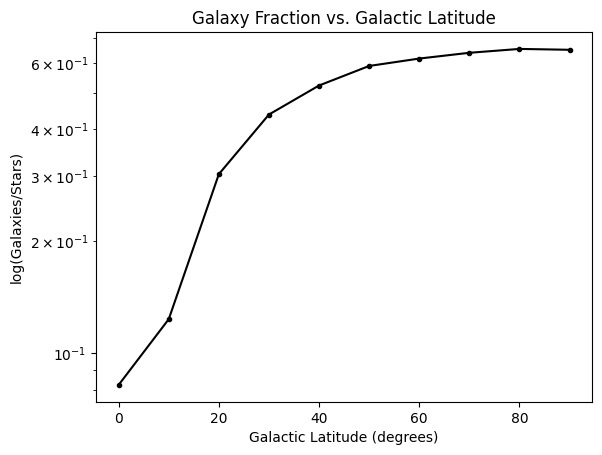

In [5]:
# plot the log of the galaxy fraction vs. galactic latitude
#plt.scatter(brange, galfrac)
plt.semilogy(brange, galfrac, marker='.',c='k')
plt.xlabel('Galactic Latitude (degrees)')
plt.ylabel('log(Galaxies/Stars)')
plt.title('Galaxy Fraction vs. Galactic Latitude')
plt.show()

Does the fractional number of galaxies, as a function of galactic latitude look similar to Hubble's plot from "The Realm of the Nebulae"?

![extinction](img/Realm_0084.jpg)

**Interpretation:** Yes! The plots are similar in shape.  The trend shows that in parts of the sky that are closer to the disk of the Milky Way (low galactic latitude), the SDSS photometric catalog is dominated by stars. At higher galactic latitudes, most of the objects are galaxies.

-------------
## Extinction and Reddening from Dust in the Interstellar Medium

Dust in the interstellar medium of the Milky Way serves to dim the light from background sources. We might expect that, if the universe is isotropic and homogeneous, then distant galaxies will have a similar mix of characteristics, regardless of their location on the sky.  Let's use this simple assumption to test the effect of dust reddening and extinction by the Milky Way.

**In the cell below, generate plots of the mean color and magnitude of galaxies as a function of galactic latitude.**  (Make sure you are using the model magnitudes, without any extinction correction!)




In [6]:
# set up a range of galactic latitudes
brange = np.linspace(0,90,10)
print(brange)

# for every bin in galactic latitude, calculate the colors of galaxies (Type=3)
color = []
rmag = []
for b in brange:
    bmin = b-1
    bmax = b+1.
    query="""
    SELECT TOP 1000 g, r 
    FROM PhotoPrimary 
    WHERE Type=3 AND (b between %f and %f)
    """  % (bmin,bmax)
    gals = CasJobs.executeQuery(query, "dr16")
    gals

    gmr = np.mean(gals['g']-gals['r'])
    meanr = np.mean(gals['r'])
    print(b, gmr, meanr)
    color.append(gmr)
    rmag.append(meanr)
    

[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
0.0 1.6229554620000026 22.28054715000002
10.0 1.4047871000000005 21.770215490000012
20.0 1.1033261299999992 21.879585329999973
30.0 1.0307513400000006 21.956925299999966
40.0 1.0093685300000013 21.87633975
50.0 0.9486509399999996 21.88774667
60.0 1.0018750419999995 21.804980518000004
70.0 0.9539030699999996 21.785148400000008
80.0 0.9792064300000011 21.861497550000003
90.0 0.9906935939999998 21.807177009999997


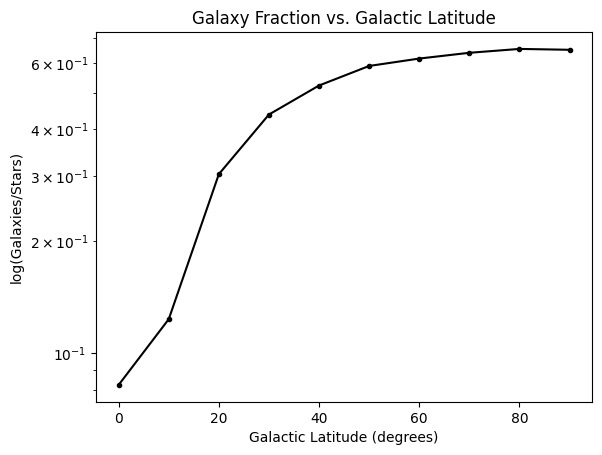

In [7]:
# plot the log of the galaxy fraction vs. galactic latitude
#plt.scatter(brange, galfrac)
plt.semilogy(brange, galfrac, marker='.',c='k')
plt.xlabel('Galactic Latitude (degrees)')
plt.ylabel('log(Galaxies/Stars)')
plt.title('Galaxy Fraction vs. Galactic Latitude')
plt.show()

In [4]:
#Galactic Center: RA  17h 45m 40.04s, Dec −29° 00′ 28.1″ (J2000 epoch)
#               = RA 266.4168333 deg, Dec -29.0078056 deg

#North Galactic Pole: RA 12h 51m 26.00s, Dec 27d 7m 42.0s
#               = RA 192.8583333 deg, Dec 27.1283333 deg

In [8]:
query="""
SELECT 
avg(modelMag_g) as gMag_avg, avg(modelMag_r) as rMag_avg
FROM PhotoPrimary 
WHERE (ra between 249 and 251) and (dec between -8 and -6)and Type = 3
"""
mag_avg = CasJobs.executeQuery(query, "dr15")

query="""
SELECT 
avg(modelMag_g) as gMag_avg, avg(modelMag_r) as rMag_avg
FROM PhotoPrimary 
WHERE (ra between 247 and 249) and (dec between 0 and 2) and Type = 3 
"""
mag_avg2 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg2)

query="""
SELECT 
avg(modelMag_g) as gMag_avg, avg(modelMag_r) as rMag_avg
FROM PhotoPrimary 
WHERE (ra between 245 and 247) and (dec between 10 and 12) and Type = 3 
"""
mag_avg3 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg3)

query="""
SELECT
avg(modelMag_g) as gMag_avg, avg(modelMag_r) as rMag_avg
FROM PhotoPrimary 
WHERE (ra between 225 and 227) and (dec between 20 and 22) and Type = 3 
"""
mag_avg4 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg4)

query="""
SELECT
avg(modelMag_g) as gMag_avg, avg(modelMag_r) as rMag_avg
FROM PhotoPrimary 
WHERE (ra between 215 and 217) and (dec between 30 and 32) and Type = 3 
"""
mag_avg5 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg5)

query="""
SELECT
avg(modelMag_g) as gMag_avg, avg(modelMag_r) as rMag_avg
FROM PhotoPrimary 
WHERE (ra between 205 and 207) and (dec between 40 and 42) and Type = 3 
"""
mag_avg6 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg6)

query="""
SELECT
avg(modelMag_g) as gMag_avg, avg(modelMag_r) as rMag_avg
FROM PhotoPrimary 
WHERE (ra between 195 and 197) and (dec between 50 and 52) and Type = 3 
"""
mag_avg7 = CasJobs.executeQuery(query, "dr15")
#mag_av7 = obj_counts.append(mag_avg6)

In [9]:
mag_avg = mag_avg.append(mag_avg2)
mag_avg = mag_avg.append(mag_avg3)
mag_avg = mag_avg.append(mag_avg4)
mag_avg = mag_avg.append(mag_avg5)
mag_avg = mag_avg.append(mag_avg6)
mag_avg = mag_avg.append(mag_avg7)

mag_avg

,gMag_avg,rMag_avg
0,23.623137,22.184653
0,22.692696,21.855032
0,23.015584,21.952519
0,22.845250,21.861544
0,22.888186,21.916460
0,22.728404,21.801524
0,22.807455,21.892206


In [13]:
#add central latitude in dec to each square degree field
lat = [20,30,40,50,60,70,80]
mag_avg['gal_lat'] = lat

In [14]:
mag_avg

,gMag_avg,rMag_avg,gal_lat
0,23.623137,22.184653,20
0,22.692696,21.855032,30
0,23.015584,21.952519,40
0,22.845250,21.861544,50
0,22.888186,21.916460,60
0,22.728404,21.801524,70
0,22.807455,21.892206,80


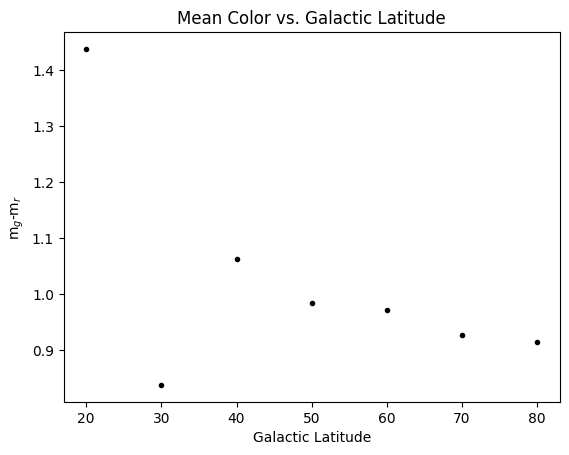

In [15]:
gmr = mag_avg['gMag_avg'] - mag_avg['rMag_avg']
plt.scatter(mag_avg['gal_lat'],gmr,marker='.',c='k')
plt.xlabel('Galactic Latitude')
plt.ylabel('m$_g$-m$_r$')
plt.title('Mean Color vs. Galactic Latitude')
plt.show()

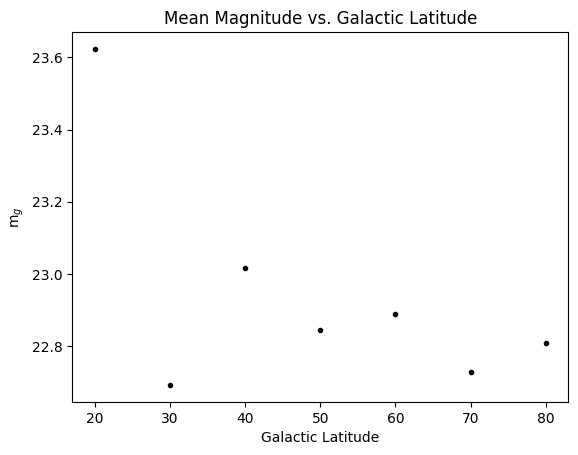

In [16]:
gmr = mag_avg['gMag_avg'] - mag_avg['rMag_avg']
plt.scatter(mag_avg['gal_lat'],mag_avg['gMag_avg'],marker='.',c='k')
plt.xlabel('Galactic Latitude')
plt.ylabel('m$_g$')
plt.title('Mean Magnitude vs. Galactic Latitude')
plt.show()

**If you use the "dereddened" magnitudes to calculate galaxy color, do your results change?**  Plot of your findings below.


In [17]:
query="""
SELECT 
avg(dered_g) as gMag_avg, avg(dered_r) as rMag_avg
FROM PhotoObj 
WHERE (ra between 249 and 251) and (dec between -8 and -6)and Type = 3
"""
mag_avg = CasJobs.executeQuery(query, "dr15")

query="""
SELECT 
avg(dered_g) as gMag_avg, avg(dered_r) as rMag_avg
FROM PhotoObj
WHERE (ra between 247 and 249) and (dec between 0 and 2) and Type = 3 
"""
mag_avg2 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg2)

query="""
SELECT 
avg(dered_g) as gMag_avg, avg(dered_r) as rMag_avg
FROM PhotoObj
WHERE (ra between 245 and 247) and (dec between 10 and 12) and Type = 3 
"""
mag_avg3 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg3)

query="""
SELECT
avg(dered_g) as gMag_avg, avg(dered_r) as rMag_avg
FROM PhotoObj
WHERE (ra between 225 and 227) and (dec between 20 and 22) and Type = 3 
"""
mag_avg4 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg4)

query="""
SELECT
avg(dered_g) as gMag_avg, avg(dered_r) as rMag_avg
FROM PhotoObj
WHERE (ra between 215 and 217) and (dec between 30 and 32) and Type = 3 
"""
mag_avg5 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg5)

query="""
SELECT
avg(dered_g) as gMag_avg, avg(dered_r) as rMag_avg
FROM PhotoObj
WHERE (ra between 205 and 207) and (dec between 40 and 42) and Type = 3 
"""
mag_avg6 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg6)

query="""
SELECT
avg(dered_g) as gMag_avg, avg(dered_r) as rMag_avg
FROM PhotoObj
WHERE (ra between 195 and 197) and (dec between 50 and 52) and Type = 3 
"""
mag_avg7 = CasJobs.executeQuery(query, "dr15")
#mag_av7 = obj_counts.append(mag_avg6)

In [18]:
mag_avg = mag_avg.append(mag_avg2)
mag_avg = mag_avg.append(mag_avg3)
mag_avg = mag_avg.append(mag_avg4)
mag_avg = mag_avg.append(mag_avg5)
mag_avg = mag_avg.append(mag_avg6)
mag_avg = mag_avg.append(mag_avg7)

mag_avg

,gMag_avg,rMag_avg
0,22.193211,21.114351
0,22.394294,21.460711
0,22.581691,21.641118
0,22.655020,21.698110
0,22.691848,21.670643
0,22.685278,21.758451
0,22.640786,21.709288


In [19]:
#add central latitude in dec to each square degree field
lat = [20,30,40,50,60,70,80]
mag_avg['gal_lat'] = lat

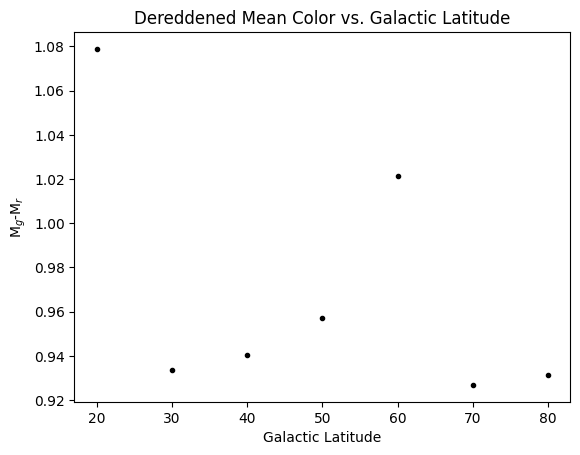

In [20]:
gmr = mag_avg['gMag_avg'] - mag_avg['rMag_avg']
plt.scatter(mag_avg['gal_lat'],gmr,marker='.',c='k')
plt.xlabel('Galactic Latitude')
plt.ylabel('M$_g$-M$_r$')
plt.title('Dereddened Mean Color vs. Galactic Latitude')
plt.show()

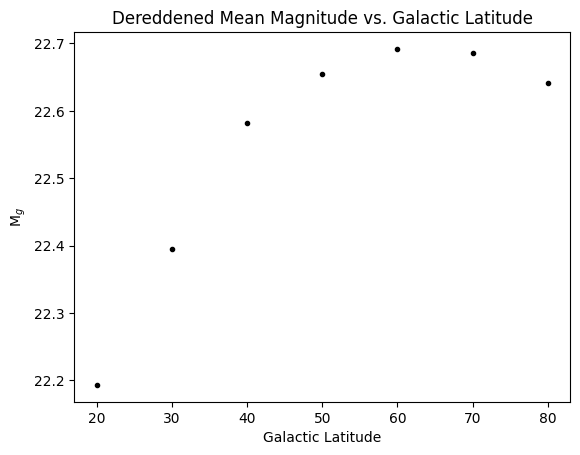

In [21]:
gmr = mag_avg['gMag_avg'] - mag_avg['rMag_avg']
plt.scatter(mag_avg['gal_lat'],mag_avg['gMag_avg'],marker='.',c='k')
plt.xlabel('Galactic Latitude')
plt.ylabel('M$_g$')
plt.title('Dereddened Mean Magnitude vs. Galactic Latitude')
plt.show()

The SDSS [PhotoPrimary table](https://skyserver.sdss.org/dr12/en/help/browser/browser.aspx#&&history=description+PhotoPrimary+V) provides measurements of dust extinction (e.g., "extinction_g") for each object in each of the 5 photometric filters: u,g,r,i, & z.  

**Measure and plot the mean extinction as a function of galactic latitude, for each of the photometric filters.** (Overplotting each of the filter measurements on the same figure.)   **Is the amplitude of the dust extinction the same or different, in each wavlength band?**

In [22]:
query="""
SELECT 
avg(extinction_u) as ux_avg, avg(extinction_g) as gx_avg, avg(extinction_r) as rx_avg, avg(extinction_i) as ix_avg, avg(extinction_z) as zx_avg
FROM PhotoPrimary 
WHERE (ra between 249 and 251) and (dec between -8 and -6)and Type = 3
"""
xavg = CasJobs.executeQuery(query, "dr15")

query="""
SELECT 
avg(extinction_u) as ux_avg, avg(extinction_g) as gx_avg, avg(extinction_r) as rx_avg, avg(extinction_i) as ix_avg, avg(extinction_z) as zx_avg
FROM PhotoPrimary 
WHERE (ra between 247 and 249) and (dec between 0 and 2) and Type = 3 
"""
xavg2 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg2)

query="""
SELECT 
avg(extinction_u) as ux_avg, avg(extinction_g) as gx_avg, avg(extinction_r) as rx_avg, avg(extinction_i) as ix_avg, avg(extinction_z) as zx_avg
FROM PhotoPrimary 
WHERE (ra between 245 and 247) and (dec between 10 and 12) and Type = 3 
"""
xavg3 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg3)

query="""
SELECT
avg(extinction_u) as ux_avg, avg(extinction_g) as gx_avg, avg(extinction_r) as rx_avg, avg(extinction_i) as ix_avg, avg(extinction_z) as zx_avg
FROM PhotoPrimary 
WHERE (ra between 225 and 227) and (dec between 20 and 22) and Type = 3 
"""
xavg4 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg4)

query="""
SELECT
avg(extinction_u) as ux_avg, avg(extinction_g) as gx_avg, avg(extinction_r) as rx_avg, avg(extinction_i) as ix_avg, avg(extinction_z) as zx_avg
FROM PhotoPrimary 
WHERE (ra between 215 and 217) and (dec between 30 and 32) and Type = 3 
"""
xavg5 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg5)

query="""
SELECT
avg(extinction_u) as ux_avg, avg(extinction_g) as gx_avg, avg(extinction_r) as rx_avg, avg(extinction_i) as ix_avg, avg(extinction_z) as zx_avg
FROM PhotoPrimary 
WHERE (ra between 205 and 207) and (dec between 40 and 42) and Type = 3 
"""
xavg6 = CasJobs.executeQuery(query, "dr15")
#mag_avg = obj_counts.append(mag_avg6)

query="""
SELECT
avg(extinction_u) as ux_avg, avg(extinction_g) as gx_avg, avg(extinction_r) as rx_avg, avg(extinction_i) as ix_avg, avg(extinction_z) as zx_avg
FROM PhotoPrimary 
WHERE (ra between 195 and 197) and (dec between 50 and 52) and Type = 3 
"""
xavg7 = CasJobs.executeQuery(query, "dr15")
#mag_av7 = obj_counts.append(mag_avg6)

In [23]:
xavg = xavg.append(xavg2)
xavg = xavg.append(xavg3)
xavg = xavg.append(xavg4)
xavg = xavg.append(xavg5)
xavg = xavg.append(xavg6)
xavg = xavg.append(xavg7)

xavg

,ux_avg,gx_avg,rx_avg,ix_avg,zx_avg
0,1.697610,1.322766,0.915084,0.680005,0.505799
0,0.381243,0.297062,0.205506,0.152713,0.113590
0,0.284973,0.222049,0.153612,0.114150,0.084907
0,0.179599,0.139943,0.096812,0.071941,0.053511
0,0.070445,0.054890,0.037973,0.028218,0.020989
0,0.027336,0.021300,0.014735,0.010950,0.008145
0,0.046373,0.036134,0.024997,0.018576,0.013817


In [24]:
#add central latitude in dec to each square degree field
lat = [20,30,40,50,60,70,80]
xavg['gal_lat'] = lat

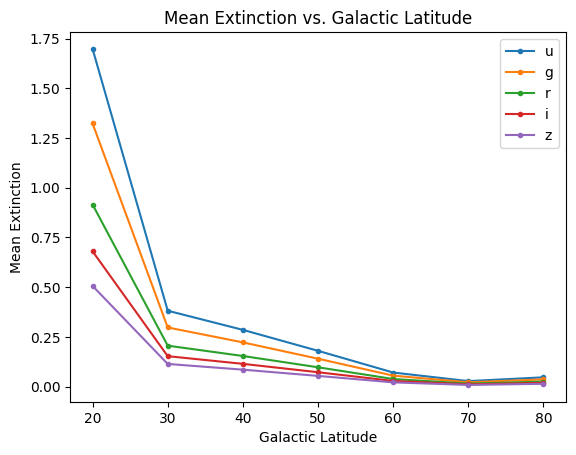

In [25]:
plt.plot(xavg['gal_lat'],xavg['ux_avg'],marker='.', label='u')
plt.plot(xavg['gal_lat'],xavg['gx_avg'],marker='.', label='g')
plt.plot(xavg['gal_lat'],xavg['rx_avg'],marker='.', label='r')
plt.plot(xavg['gal_lat'],xavg['ix_avg'],marker='.', label='i')
plt.plot(xavg['gal_lat'],xavg['zx_avg'],marker='.', label='z')
plt.xlabel('Galactic Latitude')
plt.ylabel('Mean Extinction')
plt.title('Mean Extinction vs. Galactic Latitude')
plt.legend()
plt.show()

#### Interpretation: extinction decreases across all bands with increasing galactic latitude.  The greatest amount of extinction occurs in the u-band with decreasing extinction as the bands get redder.